## Declare the necessary libraries

In [49]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_predict

C:\Users\HP\AppData\Local\Temp\ipykernel_4040\2858304008.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [50]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

## input data

In [51]:
File_Input_Path = "shampoo.csv"

series = pd.read_csv(File_Input_Path, parse_dates=[0], date_parser=parser)

In [52]:
series.head(4)

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3


In [53]:
series= series.set_index('Month')
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


# Data Preparation Make the data non-seasonal

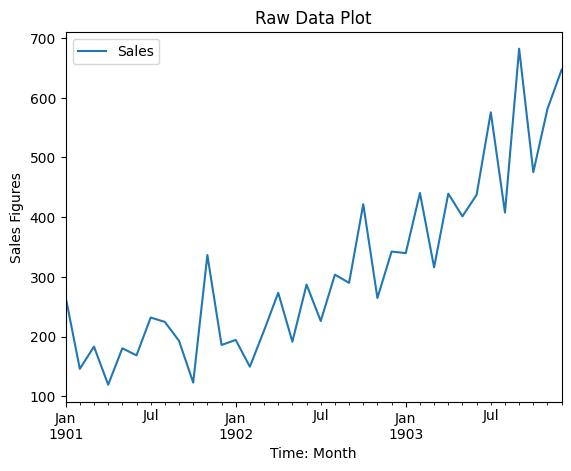

Seems that data is non-seasonal


In [54]:
series.plot()
plt.xlabel("Time: Month")
plt.ylabel("Sales Figures")
plt.title("Raw Data Plot")
plt.show()

print("Seems that data is non-seasonal")

## Model Identification
# ACF plot

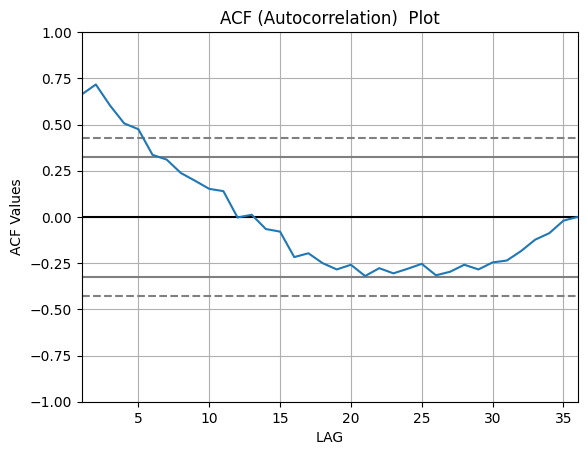

Seems that correlation value start to sharp decay at lag 5


In [55]:
autocorrelation_plot(series)
plt.xlabel("LAG")
plt.ylabel("ACF Values")
plt.title("ACF (Autocorrelation)  Plot")
plt.show()

print("Seems that correlation value start to sharp decay at lag 5")

In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

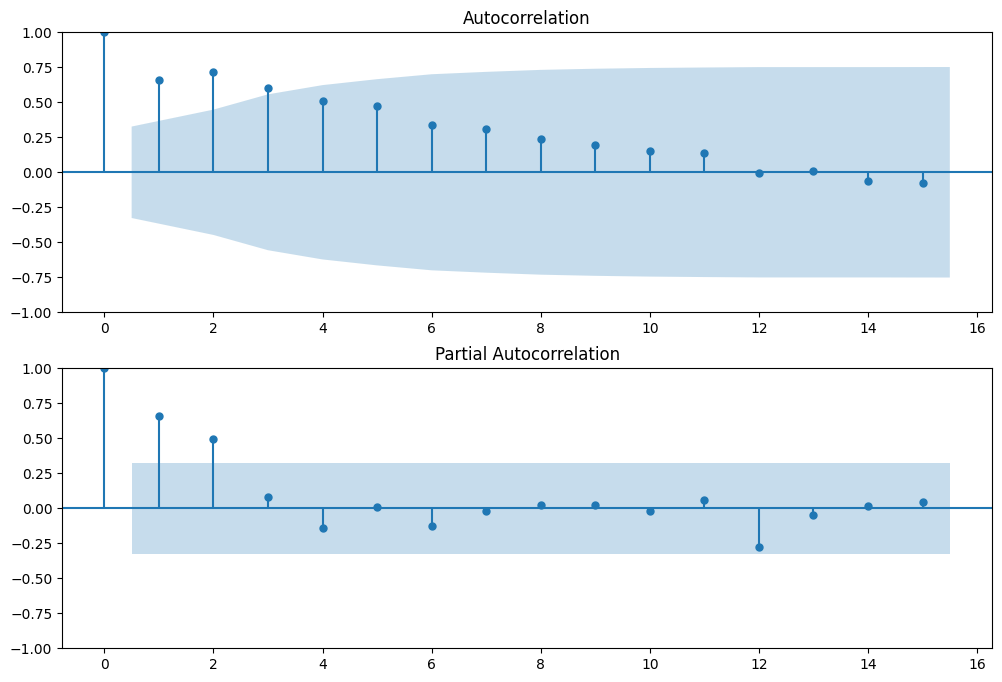

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series,lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series,lags=15,ax=ax2)

In [58]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [59]:
## split data into train and testing 
X = series.values
print('Actual data Size = ', len(X))

size = int(len(X) * 0.66)


print('Train data Size = ', int(len(X) * 0.66))

print('Test data Size = ', int(len(X) * 0.34))

Actual data Size =  36
Train data Size =  23
Test data Size =  12


In [60]:
autoarima_model = auto_arima(series, trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.71 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=1.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.36 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
To

# Create an ARIMA model AR(5,1,0)

In [61]:
train, test = X[0:size], X[size:len(X)]

In [66]:
model=SARIMAX(series,order=(1,1,2),seasonal_order=(1,1,2,12))
# model=ARIMA(train,order=(5,1,0))
results=model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Fit the model

In [67]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -134.790
Date:                            Sat, 06 Jan 2024   AIC                            283.580
Time:                                    20:39:51   BIC                            291.528
Sample:                                01-01-1901   HQIC                           285.579
                                     - 12-01-1903                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0534      0.507     -0.105      0.916      -1.047       0.940
ma.L1         -1.5606     41.935   

# Actual vs Fitted

In [68]:
start=len(train)
end=len(train)+len(test)-1

<Axes: xlabel='Month'>

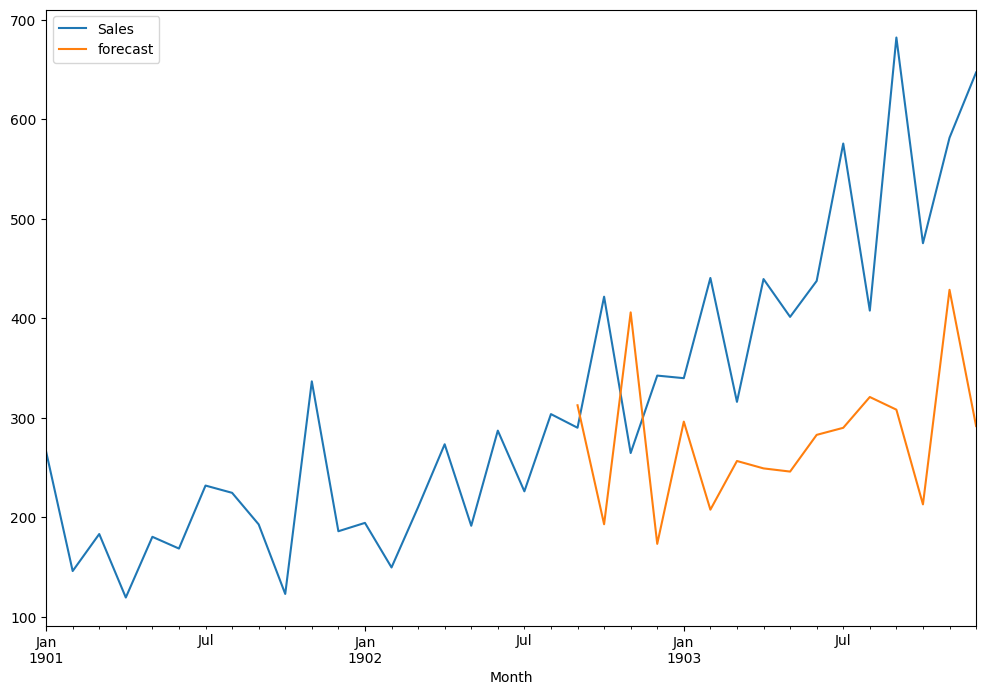

In [69]:
series['forecast']=results.predict(start=20,end=37,dynamic=True)
series[['Sales','forecast']].plot(figsize=(12,8))

In [70]:
series.tail()

,Sales,forecast
Month,,
1903-08-01,407.6,320.783905
1903-09-01,682.0,308.063200
1903-10-01,475.3,212.878732
1903-11-01,581.3,428.497589
1903-12-01,646.9,291.593586


## make future prediction


In [71]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1903-12-01',end='1905-12-01' , freq='MS')

future_datest_df=pd.DataFrame(index=future_datest_df[0:])
# future_datest_df.head(20)

In [72]:
future_datest_df= results.predict(start = 35, end = 60, dynamic= True)

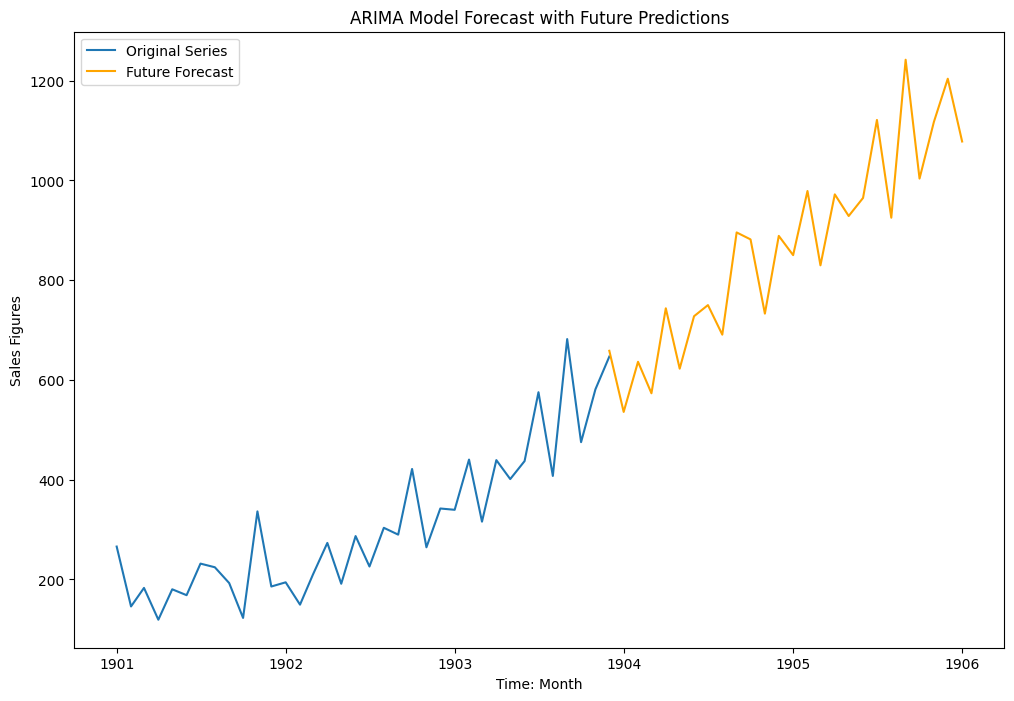

In [73]:
plt.figure(figsize=(12, 8))
plt.plot(series['Sales'], label='Original Series')
plt.plot(future_datest_df, color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()